## Cpu implementation of convolutional neural network for a trivial binary classification model with tensorflow

In [8]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sn
import os; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

### Upload the dataset 

In [9]:
data = np.load('/Users/marcosalvalaggio/code/xeye/notebooks/data/TrivialBinaryClassification.npz')
data.files

['X_train', 'X_test', 'y_train', 'y_test']

In [10]:
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

In [11]:
# Dataset dimensions (num of images, height, width)
print(f'X_train dataset shape: {X_train.shape}')
print(f'X_test dataset shape: {X_test.shape}')

X_train dataset shape: (1600, 100, 100)
X_test dataset shape: (400, 100, 100)


In [12]:
# Labels 
print(y_train.shape)
print(y_test.shape)

(1600,)
(400,)


### Visualize a single image from train dataset 

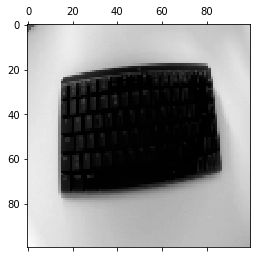

In [13]:
plt.matshow(X_train[100],cmap='gray')

Schema for map y values to category labels:

* keyboard = 0
* mouse = 1 

In [14]:
print(f'X_train[100]: {y_train[100]}')
print(f'Label for X_train[100]: keyboard')

X_train[100]: 0
Label for X_train[100]: keyboard


### Preprocessing 

In [15]:
#Min-max feature scaling = values of single pixel between [0,1] instead of [0 = black , 255 = white]
X_train = X_train / 255
X_test = X_test / 255

In [16]:
# First train dataset image scaled 
X_train[0,:,:]

array([[0.00392157, 0.00392157, 0.00392157, ..., 0.41176471, 0.4       ,
        0.30588235],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.41960784, 0.40392157,
        0.31764706],
       [0.01176471, 0.00784314, 0.00392157, ..., 0.42745098, 0.41568627,
        0.31764706],
       ...,
       [0.01960784, 0.12941176, 0.60392157, ..., 0.64313725, 0.63137255,
        0.63529412],
       [0.00784314, 0.00784314, 0.14117647, ..., 0.63529412, 0.63137255,
        0.62745098],
       [0.09411765, 0.00784314, 0.00784314, ..., 0.63137255, 0.62745098,
        0.62745098]])

In [17]:
#reshape data 
X_train_r = X_train.reshape(1600,100,100,1)
X_test_r = X_test.reshape(400,100,100,1)

### LeNet-5

In [18]:
# Hyperparameters 
output_class = 1
epochs = 2
batch = 800

In [19]:
model = tf.keras.models.Sequential()
# first layer 
model.add(tf.keras.layers.Conv2D(6, kernel_size=5, activation='tanh', input_shape=(100,100,1)))
model.add(tf.keras.layers.AveragePooling2D((2,2)))
# second layer 
model.add(tf.keras.layers.Conv2D(16, kernel_size=5, activation='tanh'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
# fully connected
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(120, activation='tanh'))
model.add(tf.keras.layers.Dense(84, activation='tanh'))
model.add(tf.keras.layers.Dense(output_class, activation='sigmoid'))
# summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 48, 48, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 16)        2416      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dense (Dense)               (None, 120)               9

In [20]:
# Specific options for the training phase: type of upgrade method of the weights in the backpropagation (SGD or adam...), and the type of loss function... 
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
model.fit(X_train_r, y_train, epochs = epochs, batch_size = batch)

Epoch 1/2
2/2 [==============================] - 4s 1s/step - loss: 0.6889 - accuracy: 0.5763
Epoch 2/2
2/2 [==============================] - 3s 1s/step - loss: 0.5050 - accuracy: 0.9762


In [22]:
test_loss, test_acc = model.evaluate(X_test_r, y_test, batch_size = 128)
test_acc

4/4 [==============================] - 0s 64ms/step - loss: 0.4173 - accuracy: 0.9850


0.9850000143051147

### Prediction of a label for a new "virtual" image passed in input to the trained model

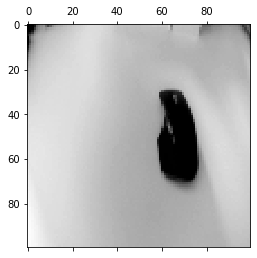

In [23]:
index = 0
plt.matshow(X_test[index],cmap='gray')

In [24]:
print(f'X_test[index]: {y_test[index]}')
print(f'Label for X_test[index]: mouse')

X_test[index]: 1
Label for X_test[index]: mouse


In [25]:
# Reshape to pass the image to the input layer of the network 
frame = X_test_r[index]
frame = frame.reshape((1,100,100,1))
frame.shape

(1, 100, 100, 1)

In [26]:
predict = model.predict(frame)
predict

1/1 [==============================] - 0s 104ms/step


array([[0.7181608]], dtype=float32)

In [27]:
label = (predict > 0.5).astype("int32")
print(f'y predicted = {label[0][0]}')
print(f'Label predicted = mouse')

y predicted = 1
Label predicted = mouse


### Confusion matrix

In [28]:
predictTest = model.predict(X_test_r)
predictTest.shape

13/13 [==============================] - 0s 23ms/step


(400, 1)

In [29]:
pred = (predictTest > 0.5).astype("int32")
pred.shape

(400, 1)

In [30]:
cm = tf.math.confusion_matrix(y_test, pred, dtype=tf.dtypes.int32)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[201,   6],
       [  0, 193]], dtype=int32)>

<AxesSubplot:>

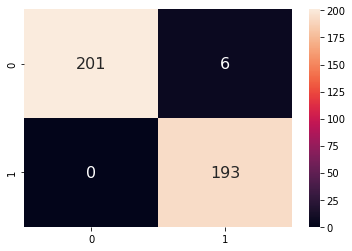

In [31]:
sn.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g') 